### What is Monte Carlo Simulation?
Computational simulations that rely on repeated random sampling to obtain results.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [24]:
yf.pdr_override()

def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    mean_returns = returns.mean()
    covMatrix = returns.cov()
    return mean_returns, covMatrix

# Fetch the S&P 500 companies list
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbol_list = sp500['Symbol'].unique().tolist()

# Define the date range
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365)

# Fetch stock data and calculate mean returns and covariance matrix
mean_returns, cov_matrix = get_data(symbol_list, startDate, endDate)

weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

[*********************100%%**********************]  503 of 503 completed


### Monte Carlo Simulation


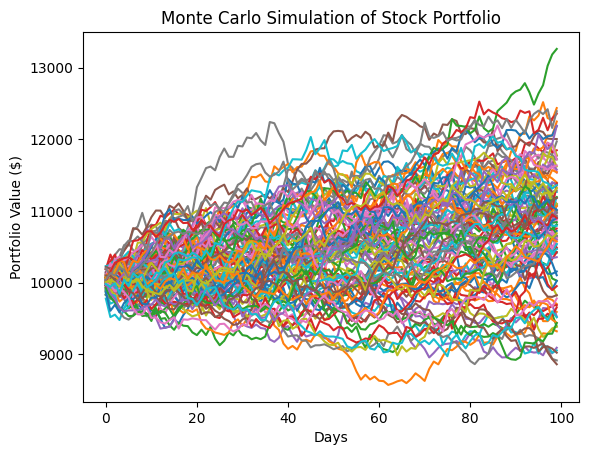

In [29]:
# Regularization parameter (small positive constant)
reg_param = 0.01

# Add regularization to the diagonal elements of the covariance matrix
cov_matrix_reg = cov_matrix + reg_param * np.eye(cov_matrix.shape[0])

# Ensure that the covariance matrix is positive semi-definite
cov_matrix_reg = np.maximum(cov_matrix_reg, 0)

mc_sims = 100
T = 100  # Timeframe of 100 days
meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initial_portfolio = 10000  # Initial portfolio value

for m in range(mc_sims):
    # MC loops from normal distribution with correlation
    Z = np.random.normal(size=(len(weights), T))
    L = np.linalg.cholesky(cov_matrix_reg)
    daily_returns = meanM + np.dot(L, Z)
    portfolio_values = np.cumprod(np.dot(weights, daily_returns) + 1) * initial_portfolio
    portfolio_sims[:, m] = portfolio_values

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of Stock Portfolio')
plt.show()
